In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [32]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

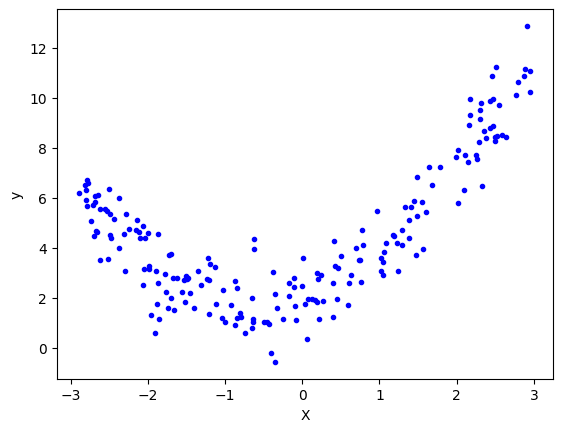

In [33]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.3091909070582899

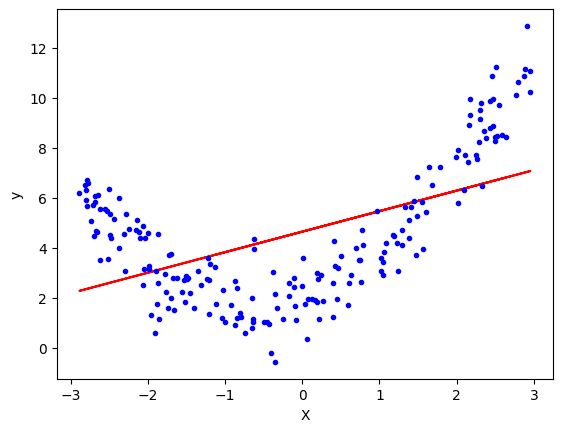

In [38]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Using Polynomial Regression

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [40]:
print(X_train[0])
print(X_train_trans[0])

[-1.11276652]
[ 1.         -1.11276652  1.23824933]


In [41]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_test_trans)

In [43]:
r2_score(y_test, y_pred)

0.8812525538268372

In [44]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91884083 0.80618898]]
[2.05456259]


In [45]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

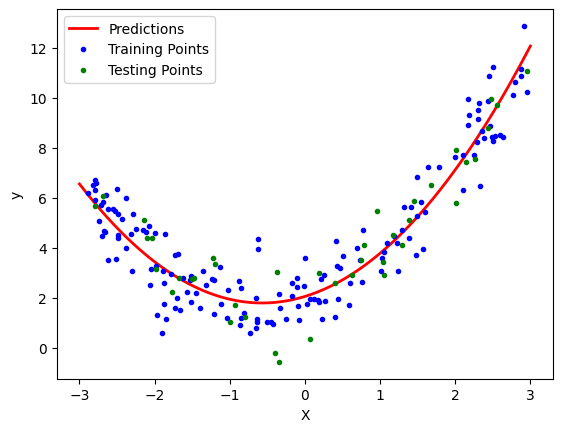

In [46]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label='Training Points')
plt.plot(X_test, y_test, "g.", label="Testing Points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Polynomial Regression Function

In [47]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ('lin_reg', lin_reg)
    ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label = "Degree " + str(degree), linewidth=2)
    
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test, 'g.', linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

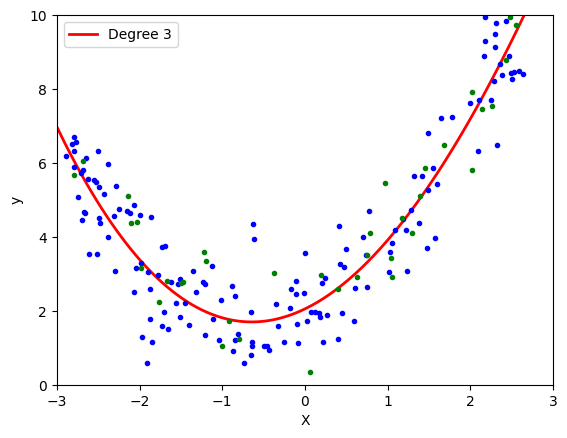

In [48]:
polynomial_regression(3)

### 3D Polynomial Regression

In [49]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

In [50]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter_3d(df, x= x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [51]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100, 2), z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

z_final = lr.predict(final).reshape(10, 10)

In [52]:
import plotly.graph_objects as go 

fig = px.scatter_3d(df, x = x.ravel(), y = y.ravel(), z = z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))

fig.show()

In [53]:
X_multi = np.array([x,y]).reshape(100, 2)
X_multi.shape

(100, 2)

In [54]:
poly = PolynomialFeatures(degree=6)
X_multi_trans = poly.fit_transform(X_multi)

In [55]:
print("Input", poly.n_features_in_)
print("Output", poly.n_output_features_)
print("Powers\n", poly.powers_)

Input 2
Output 28
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [56]:
X_multi_trans.shape

(100, 28)

In [57]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [58]:
X_test_multi = poly.transform(final)

In [59]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [60]:
fig = px.scatter_3d(x = x.ravel(), y = y.ravel(), z = z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0, 35])))

fig.show()